## 1. Load training images

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.feature import hog

# Read in our vehicles and non-vehicles
images = glob.glob('./*vehicles/*/*.png')
cars = []
notcars = []
    
for image in images:
    if 'non' in image:
        notcars.append(image)
    else:
        cars.append(image)

print ("notcars", len(notcars))
print ("cars", len(cars))       

notcars 8968
cars 8792


## 2. HOG feature extraction and visualization

In [3]:
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                                  visualise=True, feature_vector=False)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                       visualise=False, feature_vector=feature_vec)
        return features

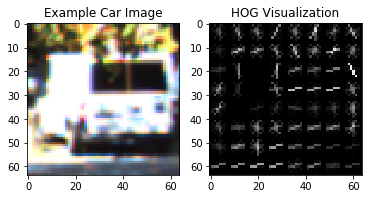

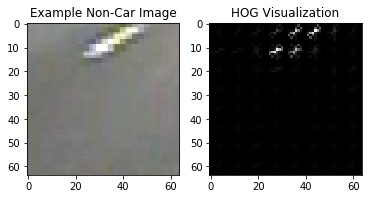

In [4]:
# Generate a random index to look at a car image
ind = np.random.randint(0, len(cars))
# Read in the image
image = mpimg.imread(cars[ind])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2
# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(gray, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)

# Generate a random index to look at a NON-car image
ind = np.random.randint(0, len(notcars))
# Read in the image
image_not = mpimg.imread(notcars[ind])
gray_not = cv2.cvtColor(image_not, cv2.COLOR_RGB2GRAY)
# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2
# Call our function with vis=True to see an image output
features_not, hog_image_not = get_hog_features(gray_not, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)


# Plot the examples

fig = plt.figure()
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')
plt.show()

fig = plt.figure()
plt.subplot(121)
plt.imshow(image_not, cmap='gray')
plt.title('Example Non-Car Image')
plt.subplot(122)
plt.imshow(hog_image_not, cmap='gray')
plt.title('HOG Visualization')
plt.show()

## 3. Spatial and color feature extraction, and visualization


In [5]:
# Define a function to compute binned color features  
def bin_spatial(img, size=(16, 16)):
    return cv2.resize(img, size).ravel() 

# Define a function to compute color histogram features  
# def color_hist(img, nbins=32, bins_range=(0, 256), graph=False):
def color_hist(img, nbins=32, graph=False):
    # Compute the histogram of the three channels separately
    hist_1 = np.histogram(img[:,:,0], bins=nbins)
    hist_2 = np.histogram(img[:,:,1], bins=nbins)
    hist_3 = np.histogram(img[:,:,2], bins=nbins)
    # Generating bin centers
    bin_edges = hist_1[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.hstack((hist_1[0], hist_2[0], hist_3[0]))
    # Return the individual histograms, bin_centers and feature vector
    if graph == True:
        return hist_1, hist_2, hist_3, bin_centers, hist_features
    elif graph == False:
        return hist_features


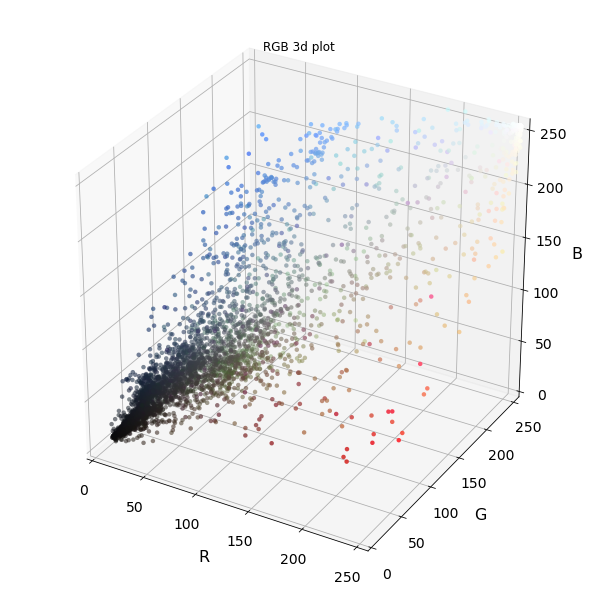

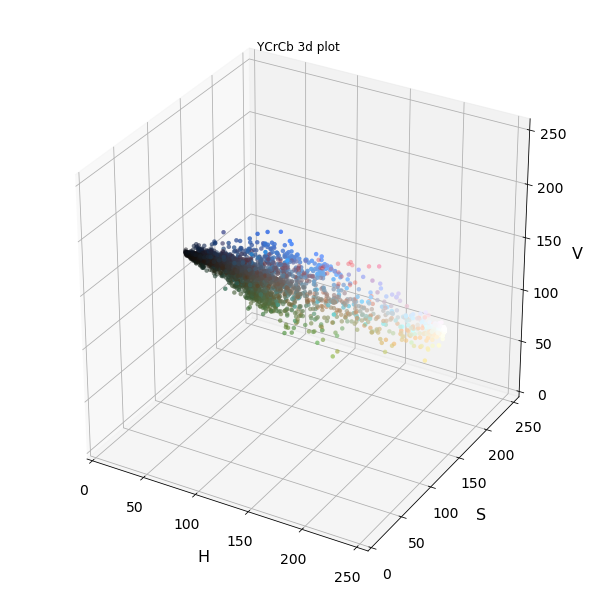

In [6]:
from mpl_toolkits.mplot3d import Axes3D

def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=[(0, 255), (0, 255), (0, 255)]):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation


# Read a color image
ind = np.random.randint(0, len(cars))
# Read in the image
img = cv2.imread(cars[ind])

# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
img_small_YCrCb = cv2.cvtColor(img_small, cv2.COLOR_BGR2YCrCb)
img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

# Plot and show

plot3d(img_small_RGB, img_small_rgb)
plt.title('RGB 3d plot')
plot3d(img_small_YCrCb, img_small_rgb, axis_labels=list("HSV"))
plt.title('YCrCb 3d plot')
plt.show()

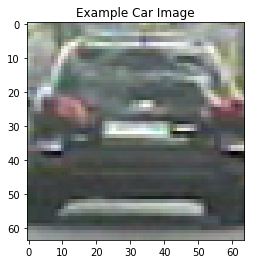

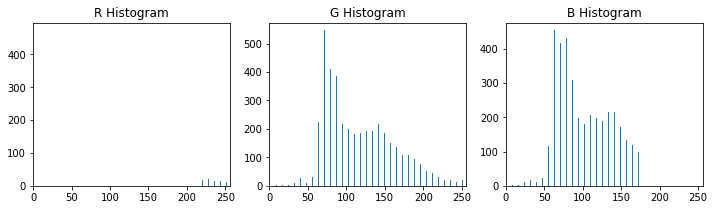

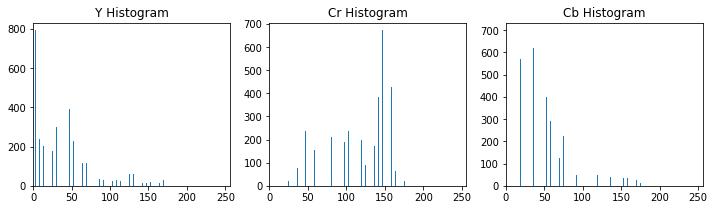

In [7]:
# Generate a random index to look at a car image
ind = np.random.randint(0, len(cars))
# Read in the image
image = mpimg.imread(cars[ind])

fig = plt.figure()
plt.imshow(image)
plt.title('Example Car Image')
image *= 255.0

# rh, gh, bh, bincen, hist_features = color_hist(image, nbins=32, bins_range=(0,256), graph = True)
rh, gh, bh, bincen, hist_features = color_hist(image, nbins=32, graph = True)
hist_features = np.array(hist_features)
# print (hist_features.shape)
# Plot a figure with all three bar charts
if rh is not None:
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    plt.show()
else:
    print('Your function is returning None for at least one variable...')
    
# Generate a random index to look at a car image
# Read in the image
image = cv2.imread(notcars[ind])
image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
rh, gh, bh, bincen, hist_features = color_hist(image, nbins=32, graph = True)

hist_features = np.array(hist_features)
# print (hist_features.shape)
# Plot a figure with all three bar charts
if rh is not None:
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('Y Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('Cr Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('Cb Histogram')
    plt.show()
else:
    print('Your function is returning None for at least one variable...')

## 4. Feature extraction function

Describe how (and identify where in your code) you trained a classifier using your selected HOG features (and color features if you used them).

In [8]:
# Define a function to extract features from a list of images
def img_features(feature_image, spatial_feat, hist_feat, hog_feat, hist_bins, orient, 
                        pix_per_cell, cell_per_block, hog_channel):
    file_features = []
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        file_features.append(spatial_features)
    if hist_feat == True:
         # Apply color_hist()
#         color_image = cv2.cvtColor(feature_image, cv2.COLOR_YCrCb2RGB)    
        hist_features = color_hist(feature_image, nbins=hist_bins, graph = False)
        #print 'hist', hist_features.shape
        file_features.append(hist_features)
    if hog_feat == True:
    # Call get_hog_features() with vis=False, feature_vec=True
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)        
        else:
            feature_image_RGB = cv2.cvtColor(feature_image, cv2.COLOR_YCrCb2RGB)
            feature_image_GRAY = cv2.cvtColor(feature_image_RGB, cv2.COLOR_RGB2GRAY)
            hog_features = get_hog_features(feature_image_GRAY[:,:], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
                #print 'hog', hog_features.shape
            # Append the new feature vector to the features list
        file_features.append(hog_features)
    return file_features

def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file_p in imgs:
        file_features = []
        image = cv2.imread(file_p) # Read in each imageone by one
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      
        file_features = img_features(feature_image, spatial_feat, hist_feat, hog_feat, hist_bins, orient, 
                        pix_per_cell, cell_per_block, hog_channel)
        features.append(np.concatenate(file_features))
        feature_image=cv2.flip(feature_image,1) # Augment the dataset with flipped images
        file_features = img_features(feature_image, spatial_feat, hist_feat, hog_feat, hist_bins, orient, 
                        pix_per_cell, cell_per_block, hog_channel)
        features.append(np.concatenate(file_features))
    return features # Return list of feature vectors

## 5. Training

In [9]:
# Define parameters for feature extraction
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 0 # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off

car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
print ('Car samples: ', len(car_features))
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
print ('Notcar samples: ', len(notcar_features))

Car samples:  17584
Notcar samples:  17936


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import time

X = np.vstack((car_features, notcar_features)).astype(np.float64)
X_scaler = StandardScaler().fit(X) # Fit a per-column scaler
scaled_X = X_scaler.transform(X) # Apply the scaler to X

y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features)))) # Define the labels vector

# Split up data into randomized training and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=22)

print('Using:',orient,'orientations', pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
svc = LinearSVC(loss='hinge') # Use a linear SVC 
t=time.time() # Check the training time for the SVC
svc.fit(X_train, y_train) # Train the classifier
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4)) # Check the score of the SVC

Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 2628
34.8 Seconds to train SVC...
Test Accuracy of SVC =  0.9885


## 6. Sliding window and car detection

Describe how (and identify where in your code) you implemented a sliding window search. How did you decide what scales to search and how much to overlap windows?

Show some examples of test images to demonstrate how your pipeline is working. How did you optimize the performance of your classifier?

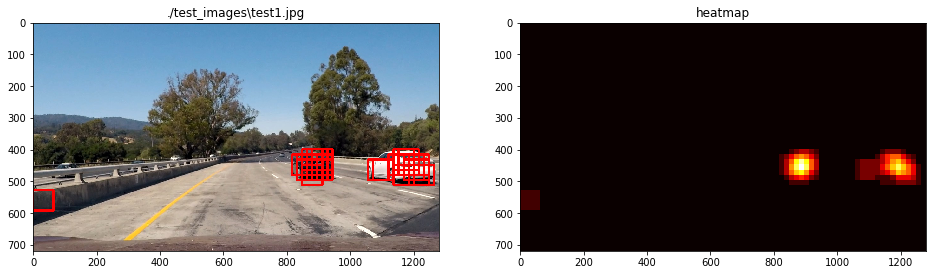

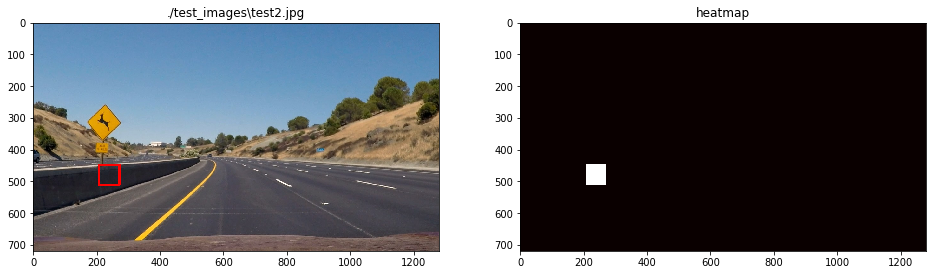

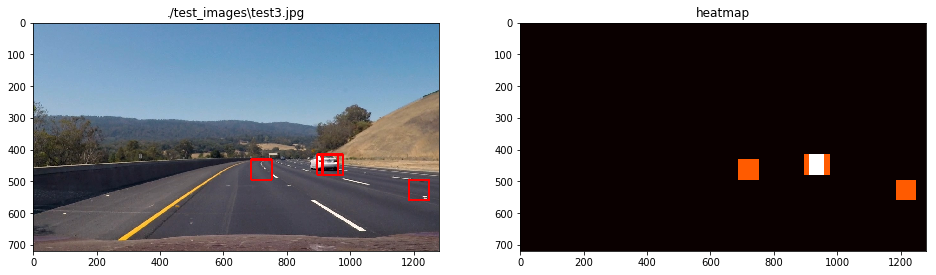

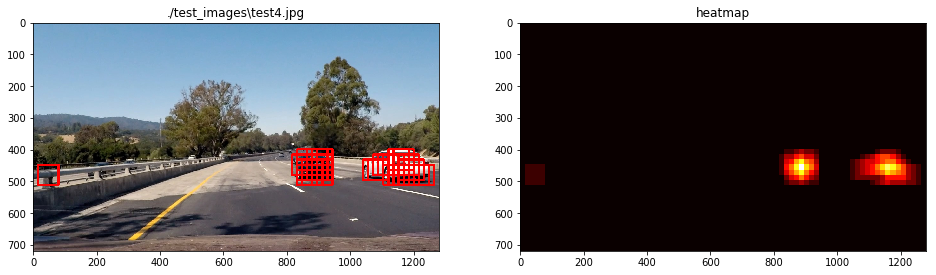

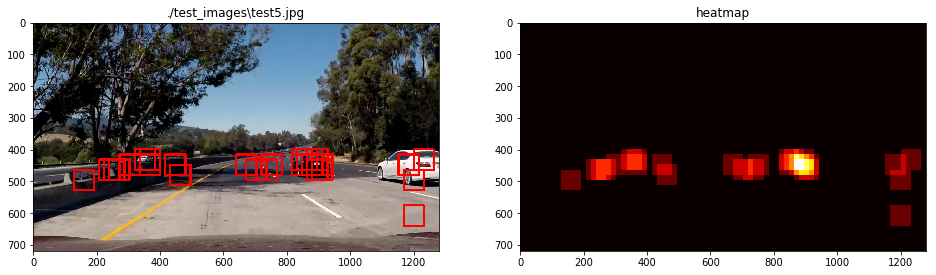

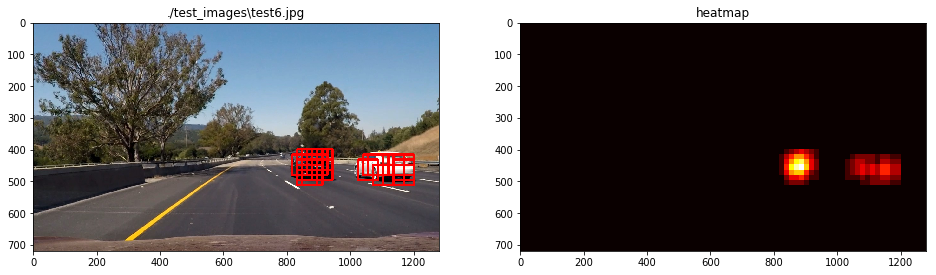

In [20]:
def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)


# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    draw_img = np.copy(img)  
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2' + color_space) 
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient * cell_per_block ** 2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
#     hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
#     hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    box_list = []
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
#             hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
#             hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
#             hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))
            hog_features= hog_feat1
    
            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop + window, xleft:xleft + window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
#             subimg = cv2.cvtColor(subimg, cv2.COLOR_YCrCb2RGB)
            hist_features = color_hist(subimg, nbins=hist_bins, graph = False)
            
            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                box_list.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))
#                 cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                
    return box_list
    
ystart = 400
ystop = 656
scale = 1.0

# img = cv2.imread('./test_images/test1.jpg')
# box_list = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
# heat = find_heat(img, box_list)
# heatmap = add_heat(heatmap, box_list)
# heatmap = np.clip(heatmap, 0, 255)
# for i in range(len(box_list)):
#     cv2.rectangle(img, box_list[i][0],box_list[i][1],(0,0,255),6)

# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.show()
# plt.imshow(heatmap, cmap='hot')
# plt.show()

fnames = glob.glob('./test_images/*')
for fname in fnames:
    img = cv2.imread(fname)
    box_list = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    heat = find_heat(img, box_list)
    heatmap = add_heat(heat, box_list)
    heatmap = np.clip(heatmap, 0, 255)
    for i in range(len(box_list)):
        cv2.rectangle(img, box_list[i][0],box_list[i][1],(0,0,255),6)
    fig = plt.figure(figsize = (16,16))
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(fname)
    plt.subplot(122)
    plt.imshow(heatmap, cmap ='hot')
    plt.title('heatmap')
    plt.show()


## 7. Image processing (heatmap and thresholding)

./test_images\test1.jpg


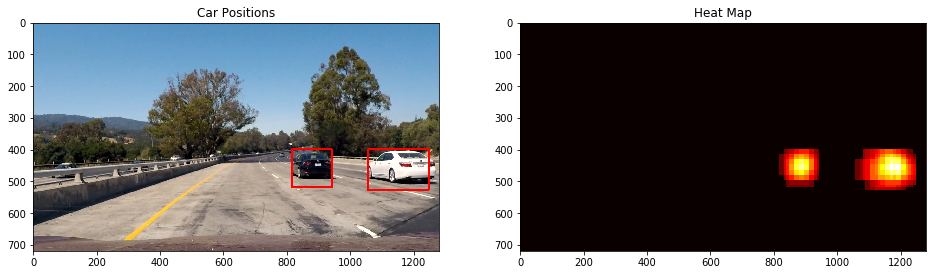

./test_images\test2.jpg


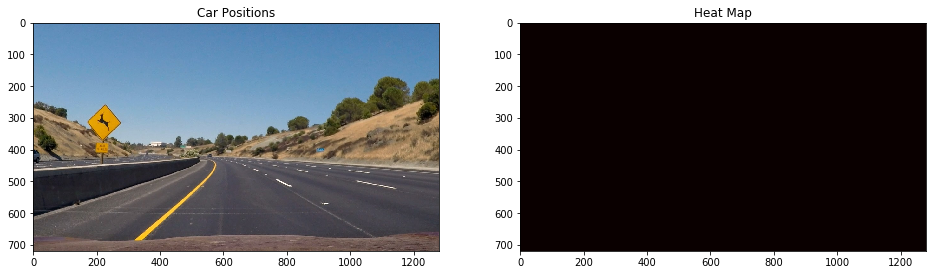

./test_images\test3.jpg


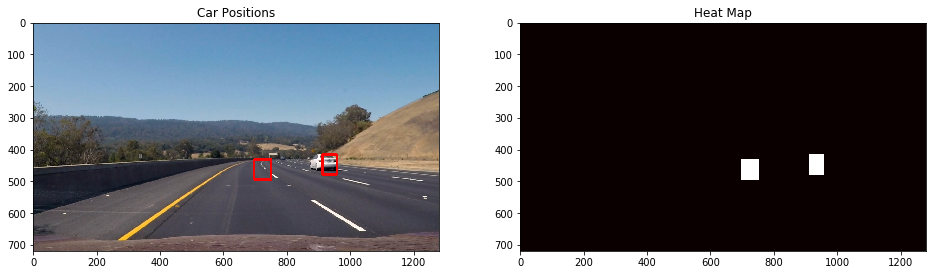

./test_images\test4.jpg


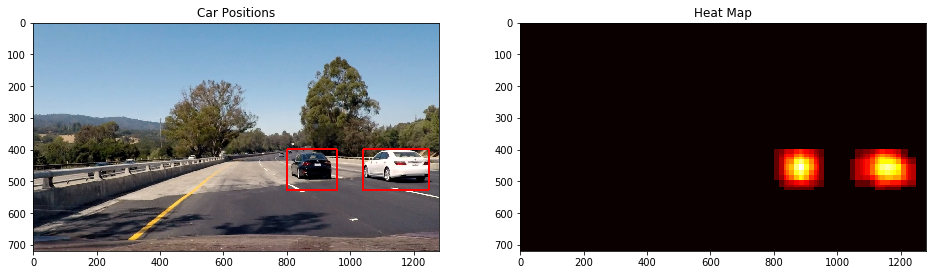

./test_images\test5.jpg


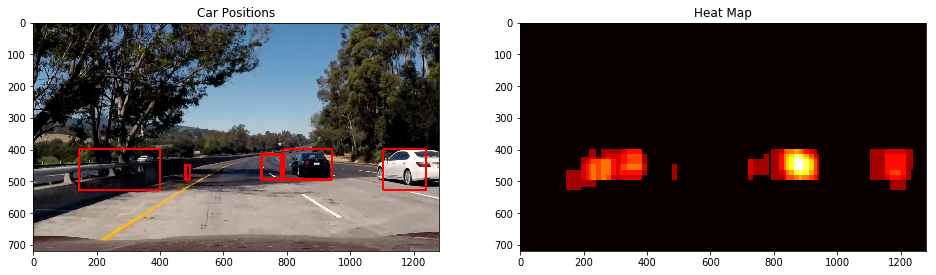

./test_images\test6.jpg


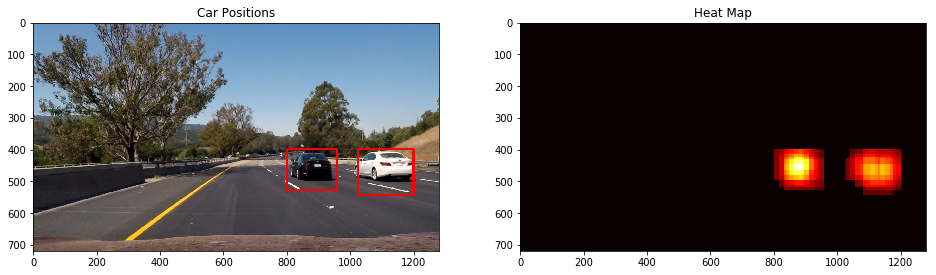

In [13]:
# Read in image similar to one shown above 
from scipy.ndimage.measurements import label

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

def find_box(img):
    ystart = 400
    ystop = 550
    scale = 1.0
    box_list = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    
    ystart = 400
    ystop = 600
    scale = 1.5
    temp = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    box_list += temp

    ystart = 400
    ystop = 600
    scale = 2.0
    temp = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    box_list += temp
#     box_list += temp
    
    ystart = 400
    ystop = 600
    scale = 2.5
    temp = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    box_list += temp
#     box_list += temp
#     box_list += temp
    return box_list

def find_heat(img, box_list):
    heat = np.zeros_like(img[:,:,0]).astype(np.float)
    # Add heat to each box in box list
    heat = add_heat(heat,box_list)
    return heat

def thresholded_img(img, heat, threshold, heatmap_check=False):
    # Apply threshold to help remove false positives
    heat_thresholded = apply_threshold(heat,threshold)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat_thresholded, 0, 255)
#     print (heatmap.shape)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(img), labels)
    if heatmap_check == True:
        return draw_img, heatmap
    else:
        return draw_img

def process_image(img, threshold, heatmap_check = False, video_check = False):
    global n_count, heat, heat_list, heat_sum, heatmap
    if video_check == True:
        if n_count%2 == 0:
            n_count += 1
            box_list = find_box(img)
            heat_list.append(find_heat(img, box_list))
            if len(heat_list) > 20:
                heat_list.pop(0)
            heat_sum = np.zeros_like(heat_list[0])
            for pair in heat_list:
                heat_sum += pair
            heat_sum = heat_sum // len(heat_list) # calculate the average
        else:
            n_count += 1
        draw_img = thresholded_img(img, heat_sum, threshold, heatmap_check=False)
        return draw_img
    else:
        box_list = find_box(img)
        heat = find_heat(img, box_list)
        draw_img, heatmap = thresholded_img(img, heat, threshold, heatmap_check = True)
        return draw_img, heatmap
    
    
threshold = 2

# for single image
# img = cv2.imread('./test_images/test5.jpg')
# draw_img, heatmap = process_image(img, threshold = threshold, heatmap_check = True, video_check = False)

# fig = plt.figure(figsize=(16,16))
# plt.subplot(121)
# plt.imshow(cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB))
# plt.title('Car Positions')
# plt.subplot(122)
# plt.imshow(heatmap, cmap='hot')
# plt.title('Heat Map')
# plt.show()

# for multiple images
images = glob.glob('./test_images/*')
for fname in images:
    img = cv2.imread(fname)
    draw_img, heatmap = process_image(img, threshold = threshold, heatmap_check = True, video_check = False)
    print (str(fname))
    fig = plt.figure(figsize=(16,16))
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB))
    plt.title('Car Positions')
    plt.subplot(122)
    plt.imshow(heatmap, cmap='hot')
    plt.title('Heat Map')
    plt.show()

## 8. Video processing

Provide a link to your final video output. Your pipeline should perform reasonably well on the entire project video (somewhat wobbly or unstable bounding boxes are ok as long as you are identifying the vehicles most of the time with minimal false positives.)

Describe how (and identify where in your code) you implemented some kind of filter for false positives and some method for combining overlapping bounding boxes.

In [21]:
from moviepy.editor import VideoFileClip

n_count = 0
heat = ()
heat_list = []
heat_sum = ()
heatmap = ()
threshold = 3
# laneline.init_params(0.0)
def process_image_video(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#     print (np.min(image), np.max(image))
    image = cv2.cvtColor(process_image(image, threshold, heatmap_check = False, video_check = True), cv2.COLOR_BGR2RGB)
    return image
output_v = 'project_video_proc.mp4'
clip1 = VideoFileClip("project_video.mp4")
# clip1 = VideoFileClip("project_video.mp4")
clip = clip1.fl_image(process_image_video)
%time clip.write_videofile(output_v, audio=False)

[MoviePy] >>>> Building video project_video_proc.mp4
[MoviePy] Writing video project_video_proc.mp4


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [10:47<00:00,  2.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_proc.mp4 

Wall time: 10min 50s


In [ ]:
# class Vehicle():
#     def __init__(self):
#         self.detected = False # was the Vehicle detected in the last iteration?
#         self.n_detections = 0 # Number of times this vehicle has been
#         self.n_nondetections = 0 # Number of consecutive times this car has not been detected 
#         self.xpixels = None # Pixel x values of last detection
#         self.ypixels = None # Pixel y values of last detection
#         self.recent_xfitted = [] # x position of the last n fits of the bounding box
#         self.bestx = None # average x position of the last n fits
#         self.recent_yfitted = [] # y position of the last n fits of the bounding obx
#         self.besty = None # average y position of the last n fits
#         self.recent_wfitted = [] # width of the last n fits of the bounding box
#         self.bestw = None # average width of the last n fits
#         self.recent_hfitted = [] # height of the last n fits of the bounding box
#         self.besth = None # average height of the last n fits